In [1]:
#get latest version of ants. pip install antspy has issus when doing n4 
#this way we dont get that issue
!git clone https://github.com/ANTsX/ANTsPy.git

Cloning into 'ANTsPy'...
remote: Enumerating objects: 4235, done.
remote: Total 4235 (delta 0), reused 0 (delta 0), pack-reused 4235
Receiving objects: 100% (4235/4235), 91.27 MiB | 12.21 MiB/s, done.
Resolving deltas: 100% (2881/2881), done.


In [4]:
#cd in to antspy so we can install pakage
cd ANTsPy/


[Errno 2] No such file or directory: 'ANTsPy/'
/content/ANTsPy


In [0]:
!python setup.py install

running install
running build_py
running build_ext
Configuring ITK
No local ITK installation found... Building ITK now...
Cloning into 'itksource'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 458897 (delta 0), reused 0 (delta 0), pack-reused 458891
Receiving objects: 100% (458897/458897), 151.82 MiB | 13.04 MiB/s, done.
Resolving deltas: 100% (361481/361481), done.
Checking out files: 100% (15794/15794), done.
Already on 'master'
Your branch is up to date with 'origin/master'.
Checking out files: 100% (8418/8418), done.
Note: checking out '407989d73f5a50ac9f2251663b2f497cf900cbd7'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later

In [0]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#unzips Brats dataset into current path 
import zipfile  # For faster extraction
dataset_path = "/content/drive/My Drive/Plugg/EXJOBB/MICCAI_BraTS_2019_Data_Training.zip"  # Replace with your dataset path
zfile = zipfile.ZipFile(dataset_path)
zfile.extractall()

/content


In [0]:
import ants
import matplotlib.pyplot as plt
import numpy as np
import glob

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
Using TensorFlow backend.


In [0]:
#makes list of strings of all pathes where the images are located
patient_path = '/content/ANTsPy/MICCAI_BraTS_2019_Data_Training/*GG/*/'
#save_path = '/drive/My Drive/Plugg/EXJOBB/N4Corrected/'
t1 = glob.glob(patient_path + '*t1.nii.gz')
t2 = glob.glob(patient_path + '*t2.nii.gz')
t1ce = glob.glob(patient_path + '*t1ce.nii.gz')
flair = glob.glob(patient_path + '*flair.nii.gz')
seg = glob.glob(patient_path +  '*seg.nii.gz')

In [0]:
#go to location for saving bias corrections
cd /content/drive/My \Drive/Plugg/EXJOBB/N4Corrected

/content/drive/My Drive/Plugg/EXJOBB/N4Corrected


In [0]:
print(t1ce[1])

/content/ANTsPy/MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_CBICA_ANZ_1/BraTS19_CBICA_ANZ_1_t1ce.nii.gz


In [0]:
#loops through the list of strings makes bias correction and saves in the 
#path you are at
for i, imgs in enumerate(t1[:3]):
  img_t1 = ants.image_read(t1[i])
  img_n4_t1 = ants.n4_bias_field_correction(img_t1)
  ants.image_write(img_n4_t1, str(i) + '_t1_corrected.nii.gz' , ri=False)

  img_t2 = ants.image_read(t2[i])
  img_n4_t2 = ants.n4_bias_field_correction(img_t2)
  ants.image_write(img_n4_t2, str(i) + '_t2_corrected.nii.gz' , ri=False)

  img_t1ce = ants.image_read(t1ce[i])
  img_n4_t1ce = ants.n4_bias_field_correction(img_t1ce)
  ants.image_write(img_n4_t1ce, str(i) + '_t1ce_corrected.nii.gz' , ri=False)

  img_flair = ants.image_read(flair[i])
  img_n4_flair = ants.n4_bias_field_correction(img_flair)
  ants.image_write(img_n4_flair, str(i) + '_flair_corrected.nii.gz' , ri=False)

  img_seg = ants.image_read(seg[i])
  ants.image_write(img_seg, str(i) + '_seg.nii.gz' , ri=False)




For experementing with the files accuired and converting images to numpy rrays

In [0]:
img = ants.image_read('1_t1_corrected.nii.gz')
img_seg = ants.image_read('1_seg.nii.gz')

In [0]:
ls

0_flair_corrected.nii.gz  0_t1_corrected.nii.gz  drive/
0_seg.nii.gz              0_t2_corrected.nii.gz  sample_data/
0_t1ce_corrected.nii.gz   ANTsPy/


In [0]:
img_t1 = ants.image_read('/content/ANTsPy/MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_2013_10_1/BraTS19_2013_10_1_t1.nii.gz')
img_n4_t1 = ants.n4_bias_field_correction(img_t1)

In [0]:
import numpy as np

In [0]:
np.save('data', img_n4_t1)

TypeError: ignored

In [0]:
img_t1_array = img_n4_t1.numpy()

In [0]:
n4_img = ants.n4_bias_field_correction(img)

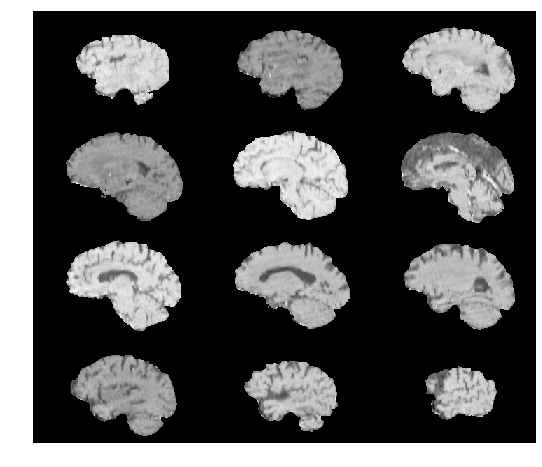

In [0]:
ants.plot(img)

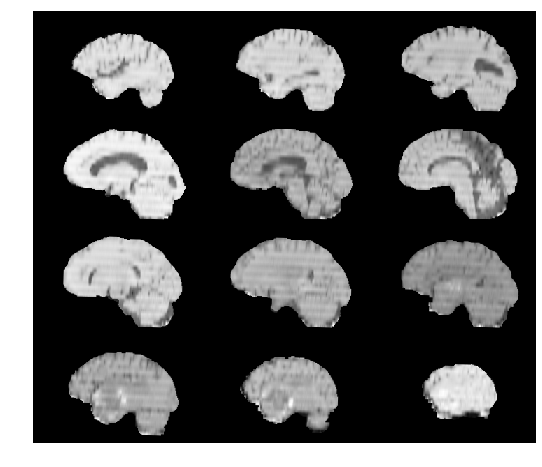

In [0]:
ants.plot(n4_img)

In [0]:
ls

ANTsPy/  drive/  sample_data/


In [0]:
ants.image_write(n4_img, 'n4_corrected.nii.gz' , ri=False)

In [0]:
array = img.flatten


In [0]:
import numpy as np
import matplotlib.pyplot as plt


In [0]:
img_array = img.numpy()
img_seg_array = img_seg.numpy() 

In [0]:
print(img_array.shape)

(240, 240, 155)


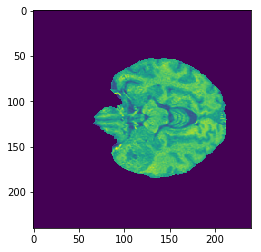

In [0]:
plt.imshow(img_array[:,:,60])
plt.show()

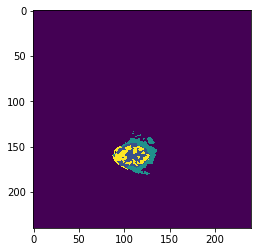

In [0]:
plt.imshow(img_seg_array[:,:,60])
plt.show()

In [0]:
print(np.mean(img_array))
print(np.mean(img_n4_array))

63.008804
65.58459
